In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
data =pd.read_csv('tcs2.csv')
y = data

In [4]:
print(y)

         Date  Symbol  Series     Open   High Price   Low Price  \
0    1-Oct-18     TCS      EQ  2190.90      2275.95     2190.35   
1   28-Sep-18     TCS      EQ  2178.00      2190.00     2158.85   
2   27-Sep-18     TCS      EQ  2141.90      2209.70     2135.80   
3   26-Sep-18     TCS      EQ  2187.00      2199.00     2135.10   
4   25-Sep-18     TCS      EQ  2204.90      2211.90     2153.80   
5   24-Sep-18     TCS      EQ  2115.00      2210.50     2098.15   
6   21-Sep-18     TCS      EQ  2077.00      2121.00     2050.15   
7   19-Sep-18     TCS      EQ  2071.90      2089.00     2066.85   
8   18-Sep-18     TCS      EQ  2073.00      2078.80     2057.60   
9   17-Sep-18     TCS      EQ  2070.00      2077.80     2054.55   
10  14-Sep-18     TCS      EQ  2044.00      2071.55     2018.15   
11  12-Sep-18     TCS      EQ  2052.35      2068.90     2040.00   
12  11-Sep-18     TCS      EQ  2089.00      2089.00     2042.20   
13  10-Sep-18     TCS      EQ  2084.40      2093.40     2074.2

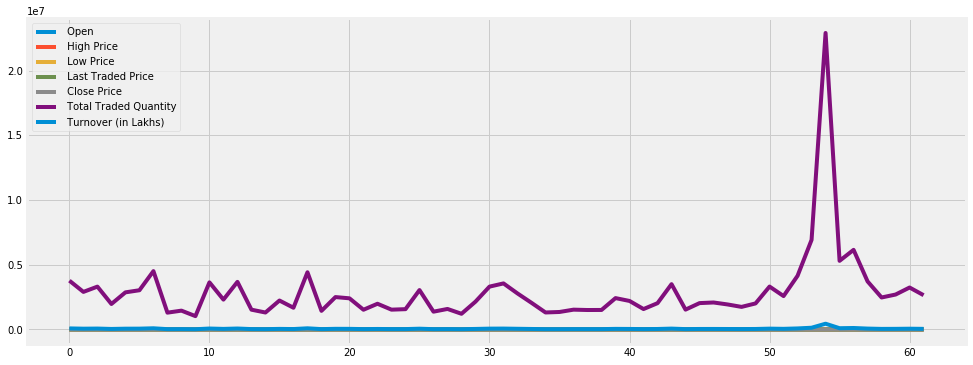

In [5]:
y.plot(figsize=(15, 6))
plt.show()

In [6]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [53]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            #print("pm")
        except:
            continue

In [57]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).